In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('OLIST.csv')
df1 = pd.read_csv('categorical_data.csv')

In [3]:
df2 = df.drop(['Class', 'product_Computer_Office', 'product_Construction',
       'product_Cosmetics_accessories', 'product_Electronics',
       'product_Furniture', 'product_Health_Medicinies', 'product_Households',
       'product_Sports_Fashion'], axis = 1).set_index('customer_unique_id')
df2['Product'] = df1['product'].values
df2 = pd.get_dummies(df2, columns=['Product'])

In [4]:
df.shape, df1.shape, df2.shape

((114073, 30), (114073, 22), (114073, 28))

-------------

Let us try with Clustering technique whether our assumption hold true for the data or not.

In [13]:
df2.head(3)

,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,Delivery_befor_time,Order_frequency,Product_Computer_Office,Product_Construction,Product_Cosmetics_accessories,Product_Electronics,Product_Furniture,Product_Health_Medicinies,Product_Households,Product_Sports_Fashion
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
1,119.0,18.93,1.0,4.0,137.93,5,33.0,523.0,3.0,584.0,...,0.0,1,1,0,0,0,0,0,0,0
2,69.9,13.07,1.0,1.0,82.97,5,59.0,314.0,3.0,8000.0,...,2.0,1,1,0,0,0,0,0,0,0
3,349.0,29.50,1.0,5.0,378.50,4,52.0,2032.0,1.0,200.0,...,5.0,1,1,0,0,0,0,0,0,0


In [8]:
df2.dtypes

price                            float64
freight_value                    float64
payment_sequential               float64
payment_installments             float64
payment_value                    float64
review_score                       int64
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
product_weight_g                 float64
product_length_cm                float64
product_height_cm                float64
product_width_cm                 float64
order_status                       int64
Delivered_item_in_days           float64
Quickness_in_deliveries_days     float64
Quickness_in_approval_in_days    float64
Quickness_in_loading_in_days     float64
payment_type                       int64
Review_Answer_within_days        float64
Delivery_befor_time              float64
Order_frequency                    int64
Product_Computer_Office            uint8
Product_Construction               uint8
Product_Cosmetic

--------------

# K-means Clustering:

In [7]:
df3 = df2[['price', 'freight_value', 'payment_sequential', 'payment_installments',
       'payment_value', 'review_score', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'Product_volume',
       'order_status', 'Delivered_item_in_days',
       'Difference_between_estimated_Delivery_days', 'Quickness_in_approval_in_days',
       'Quickness_in_loading_in_days', 'payment_type',
       'Review_Answer_within_days', 'Delivery_befor_time', 'Order_frequency']]


from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_scaled=ss.fit_transform(df3)
df_scaled_user=pd.DataFrame(df_scaled,columns=df3.columns,index=df2.index)
df_scaled_user.head()

,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,Product_volume,order_status,Delivered_item_in_days,Difference_between_estimated_Delivery_days,Quickness_in_approval_in_days,Quickness_in_loading_in_days,payment_type,Review_Answer_within_days,Delivery_befor_time,Order_frequency
customer_unique_id,,,,,,,,,,,,,,,,,,,,
1,-0.185207,-0.068676,-0.132247,0.378745,-0.128561,0.687017,-1.577584,-0.402435,0.461885,-0.404573,-0.555688,0.007834,-0.628082,1.291027,-0.530235,-0.506844,0.114419,-0.264480,-0.553908,-0.286988
2,-0.304251,-0.441297,-0.132247,-0.699734,-0.335083,0.687017,1.018089,-0.723697,0.461885,1.563391,1.807981,0.007834,-0.309298,0.473054,-0.530235,-0.506844,0.114419,0.042445,-0.360499,-0.286988
3,0.372435,0.603442,-0.132247,0.738238,0.775424,-0.049419,0.319254,1.917111,-0.702260,-0.506474,-0.552961,0.007834,0.009486,1.836342,-0.530235,-0.222156,0.114419,0.042445,-0.070385,-0.286988
4,-0.352524,-0.247992,-0.132247,-0.699734,-0.398475,-0.785856,-0.878749,-0.957343,-0.702260,-0.320717,-0.172213,0.007834,-0.309298,0.336726,-0.530235,0.062531,0.114419,-0.264480,-0.070385,-0.286988
5,1.315577,0.111912,-0.132247,1.097731,0.401009,-2.258729,0.019754,1.781843,-0.702260,-0.387059,-0.478635,0.007834,-0.309298,0.609383,-0.530235,0.062531,0.114419,-0.264480,-0.167090,0.063499


In [17]:
X = df_scaled_user.values

from sklearn.cluster import KMeans

wcv = []

for i in range(1,5):
    km = KMeans(i)
    km.fit(X)
    wcv.append(km.inertia_)

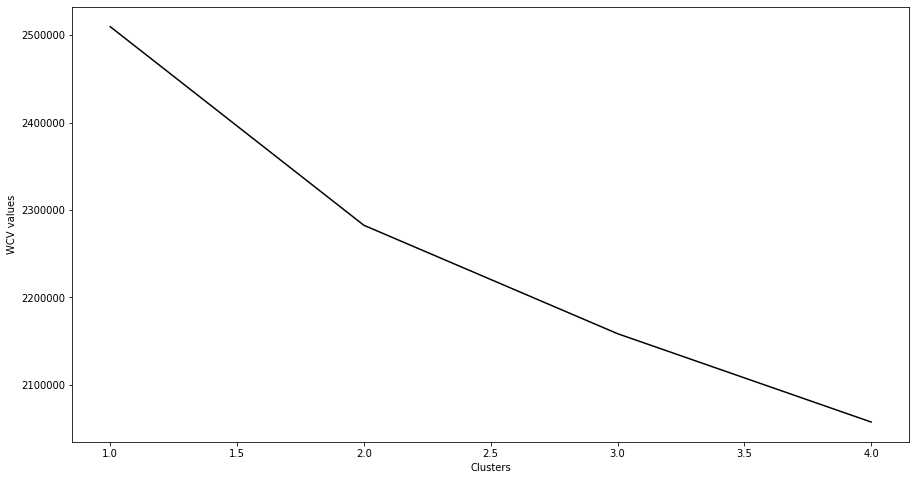

In [18]:
plt.figure(figsize = (15,8))
plt.plot(range(1,5), wcv, color = 'black')
plt.xlabel('Clusters')
plt.ylabel('WCV values')
plt.show()

In [19]:
from sklearn.metrics import silhouette_score

sel = []

for i in range(2,5):
    km = KMeans(i)
    km.fit(X)
    sel.append(silhouette_score(X, km.labels_))

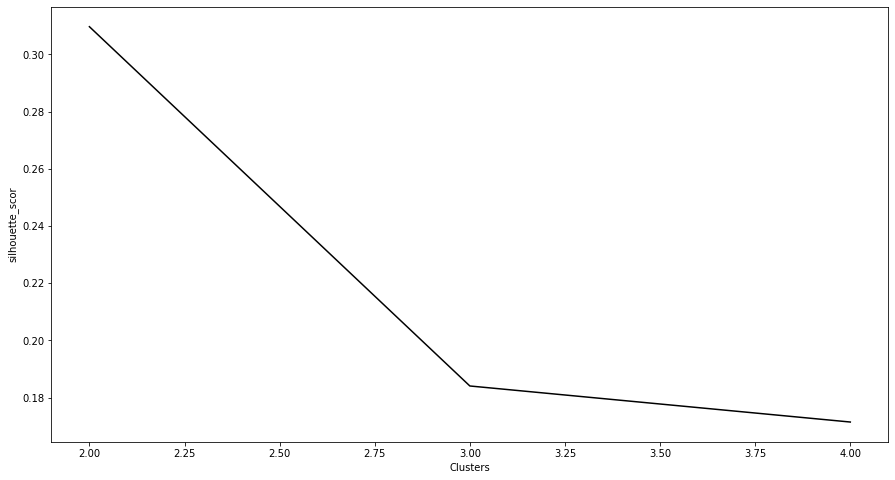

In [29]:
plt.figure(figsize = (15,8))
plt.plot(range(2,5), sel, color = 'black')
plt.xlabel('Clusters')
plt.ylabel('silhouette_scor')
plt.show()

We see here 2 clusters are absolutely fine.

In [30]:
from sklearn.cluster import KMeans
clust_mod=KMeans(n_clusters=2,random_state=48)
clust_mod.fit(X)
labels=clust_mod.labels_

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
clust_mod=KMeans(n_clusters=3,random_state=48)
viz=SilhouetteVisualizer(clust_mod,colors='yellowbrick')
viz.fit(X)
viz.show()

In [21]:
km = KMeans(n_clusters=2)
pred = km.fit_predict(X)

In [22]:
dataframe = pd.DataFrame()
dataframe['Original'] = df.Class.values
dataframe['Predicted'] = pred

In [23]:
(dataframe[dataframe.Original == dataframe.Predicted].shape[0]/dataframe.shape[0])*100

43.921874589078925

-----------

Accuracy with PCA technique:

In [24]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

var = np.cumsum(pca.explained_variance_ratio_)
var[var>0.95]

array([0.9562359 , 0.97264891, 0.98499702, 0.9943624 , 1.        ])

In [25]:
pca  = PCA(n_components = 0.95)
X_red = pca.fit_transform(X)

km = KMeans(n_clusters=2)
pred1 = km.fit_predict(X_red)

In [26]:
dataframe1 = pd.DataFrame()
dataframe1['Original'] = df.Class.values
dataframe1['Predicted'] = pred1

In [27]:
(dataframe1[dataframe1.Original == dataframe1.Predicted].shape[0]/dataframe1.shape[0])*100

56.04656667221867

Both clusterings do not show a good set of eliments what we have seen.

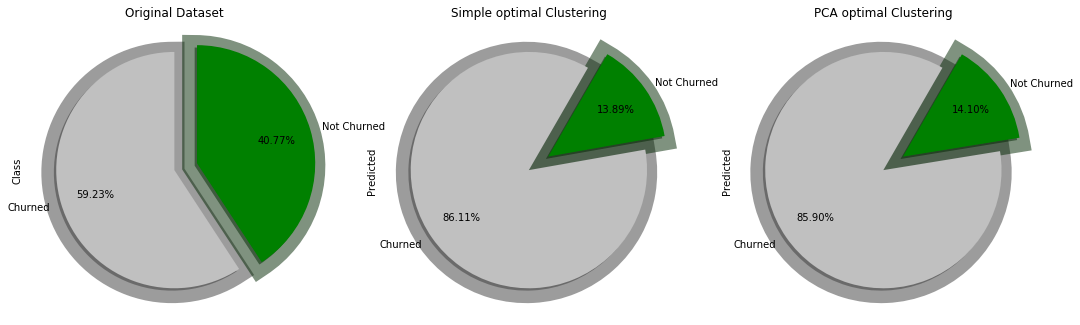

In [28]:
fig, axes = plt.subplots(1,3,figsize=(18,8))

df['Class'].value_counts().plot(kind='pie',ax=axes[0],explode = [0.0,0.2],
                                            autopct = '%1.2f%%', colors = ['silver', 'green'],
                                            labels = ['Churned', 'Not Churned'],
       shadow = True, wedgeprops = {'linewidth': 25}  , pctdistance= 0.7, startangle = 90)

dataframe['Predicted'].value_counts().plot(kind='pie',ax=axes[1],explode = [0.0,0.2],
                                           autopct = '%1.2f%%', colors = ['silver', 'green'],
                                           labels = ['Churned', 'Not Churned'],
       shadow = True, wedgeprops = {'linewidth': 25}  , pctdistance= 0.7, startangle = 60)

dataframe1['Predicted'].value_counts().plot(kind='pie',ax=axes[2],explode = [0.0,0.2],
                                            autopct = '%1.2f%%', colors = ['silver', 'green'],
                                            labels = ['Churned', 'Not Churned'],
       shadow = True, wedgeprops = {'linewidth': 25}  , pctdistance= 0.7, startangle = 60)

axes[0].title.set_text('Original Dataset')
axes[1].title.set_text('Simple optimal Clustering')
axes[2].title.set_text('PCA optimal Clustering')

plt.show()

----------

After scaling and numerical data extraction:

In [16]:
df4 = df[['price', 'freight_value', 'payment_sequential',
       'payment_installments', 'payment_value', 'review_score',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'order_status',
       'Delivered_item_in_days', 'Quickness_in_deliveries_days',
       'Quickness_in_approval_in_days', 'Quickness_in_loading_in_days', 'Review_Answer_within_days',
       'Delivery_befor_time', 'Order_frequency']]

In [17]:
df4.iloc[:5, :10]

,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g
0,149.99,9.61,1.0,2.0,159.60,5,57.0,2188.0,1.0,450.0
1,81.99,7.92,1.0,1.0,89.91,5,32.0,321.0,1.0,207.0
2,79.00,15.30,1.0,3.0,94.30,5,59.0,200.0,3.0,6050.0
3,109.89,13.11,1.0,1.0,1230.00,1,33.0,300.0,1.0,207.0
4,89.90,12.13,1.0,1.0,102.03,5,54.0,245.0,1.0,1383.0


In [18]:
df4.iloc[:5, 10:20]

,product_length_cm,product_height_cm,product_width_cm,order_status,Delivered_item_in_days,Quickness_in_deliveries_days,Quickness_in_approval_in_days,Quickness_in_loading_in_days,Review_Answer_within_days,Delivery_befor_time
0,20.0,15.0,25.0,1,7.0,7.0,0.0,5.0,3.0,3.0
1,17.0,12.0,13.0,1,6.0,4.0,0.0,2.0,3.0,0.0
2,60.0,20.0,29.0,1,13.0,12.0,0.0,1.0,3.0,7.0
3,19.0,11.0,14.0,1,9.0,12.0,0.0,3.0,2.0,3.0
4,50.0,10.0,40.0,1,4.0,15.0,0.0,1.0,1.0,0.0


In [19]:
df4.iloc[:5, 20:30]

,Order_frequency
0,1
1,1
2,1
3,10
4,1


In [10]:
df.iloc[:5, 30:35]

,Order_frequency,Class
0,1,1
1,1,0
2,1,1
3,10,1
4,1,1


-------------

In [20]:
from scipy.stats import zscore
df_scaled = df4.apply(zscore)

In [21]:
X = df_scaled.values

from sklearn.cluster import KMeans

wcv = []

for i in range(1,5):
    km = KMeans(i)
    km.fit(X)
    wcv.append(km.inertia_)
    
from sklearn.metrics import silhouette_score

sel = []

for i in range(2,5):
    km = KMeans(i)
    km.fit(X)
    sel.append(silhouette_score(X, km.labels_))

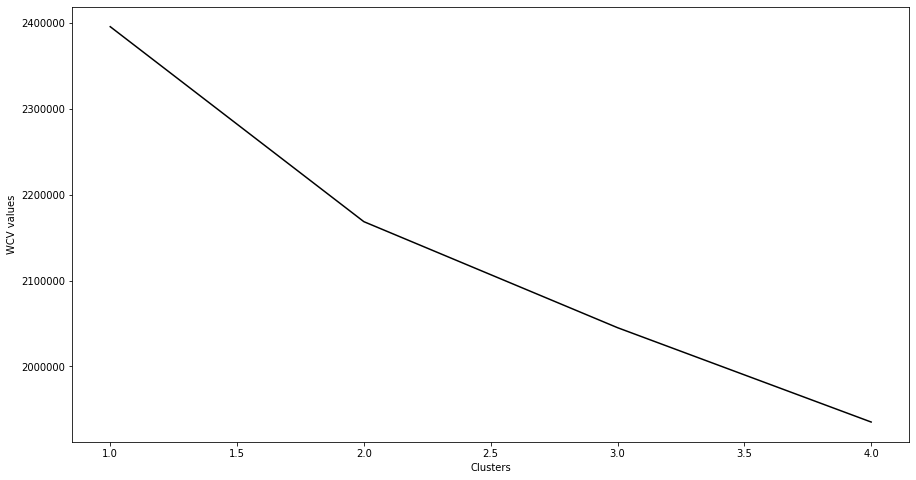

In [29]:
plt.figure(figsize = (15,8))
plt.plot(range(1,5), wcv, color = 'black')
plt.xlabel('Clusters')
plt.ylabel('WCV values')
plt.show()

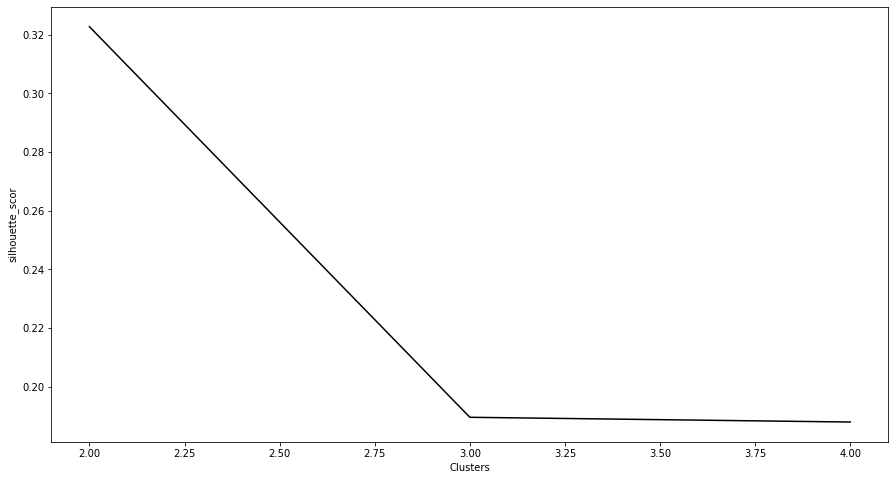

In [30]:
plt.figure(figsize = (15,8))
plt.plot(range(2,5), sel, color = 'black')
plt.xlabel('Clusters')
plt.ylabel('silhouette_scor')
plt.show()

---------------

In [32]:
km = KMeans(n_clusters=2)
pred2 = km.fit_predict(X)

dataframe3 = pd.DataFrame()
dataframe3['Original'] = df.Class.values
dataframe3['Predicted'] = pred2

(dataframe3[dataframe3.Original == dataframe3.Predicted].shape[0]/dataframe3.shape[0])*100

43.814265802922584

With PCA technique:

In [33]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

var = np.cumsum(pca.explained_variance_ratio_)
var[var>0.95]

array([0.95141685, 0.97133754, 0.98428137, 0.99408958, 1.        ])

In [35]:
pca  = PCA(n_components = 0.95)
X_red = pca.fit_transform(X)

km = KMeans(n_clusters=2)
pred3 = km.fit_predict(X_red)

dataframe4 = pd.DataFrame()
dataframe4['Original'] = df.Class.values
dataframe4['Predicted'] = pred3

(dataframe4[dataframe4.Original == dataframe4.Predicted].shape[0]/dataframe4.shape[0])*100

43.985202976936634

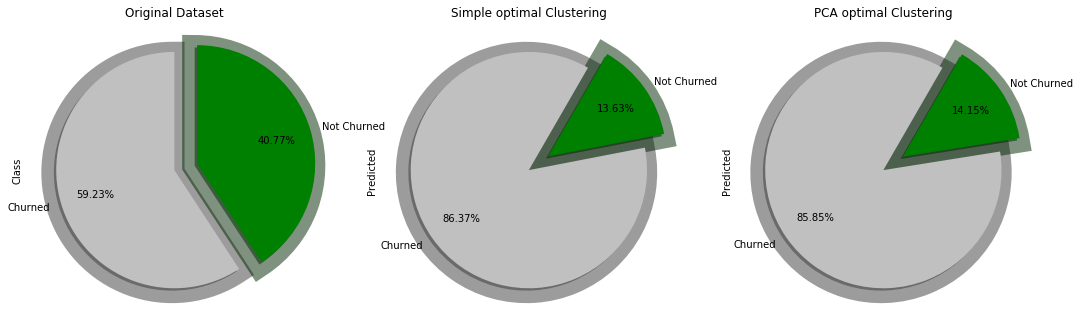

In [36]:
fig, axes = plt.subplots(1,3,figsize=(18,8))

df['Class'].value_counts().plot(kind='pie',ax=axes[0],explode = [0.0,0.2],
                                            autopct = '%1.2f%%', colors = ['silver', 'green'],
                                            labels = ['Churned', 'Not Churned'],
       shadow = True, wedgeprops = {'linewidth': 25}  , pctdistance= 0.7, startangle = 90)

dataframe3['Predicted'].value_counts().plot(kind='pie',ax=axes[1],explode = [0.0,0.2],
                                           autopct = '%1.2f%%', colors = ['silver', 'green'],
                                           labels = ['Churned', 'Not Churned'],
       shadow = True, wedgeprops = {'linewidth': 25}  , pctdistance= 0.7, startangle = 60)

dataframe4['Predicted'].value_counts().plot(kind='pie',ax=axes[2],explode = [0.0,0.2],
                                            autopct = '%1.2f%%', colors = ['silver', 'green'],
                                            labels = ['Churned', 'Not Churned'],
       shadow = True, wedgeprops = {'linewidth': 25}  , pctdistance= 0.7, startangle = 60)

axes[0].title.set_text('Original Dataset')
axes[1].title.set_text('Simple optimal Clustering')
axes[2].title.set_text('PCA optimal Clustering')

plt.show()

A little change we face here after scaling as well as getting only numerical data.

--------------

## K prototype

In [11]:
# !pip install kmodes

In [7]:
df3 = df.drop(['Class', 'product_Computer_Office', 'product_Construction',
       'product_Cosmetics_accessories', 'product_Electronics',
       'product_Furniture', 'product_Health_Medicinies', 'product_Households',
       'product_Sports_Fashion'], axis = 1).set_index('customer_unique_id')
df3['Product'] = df1['product'].values

In [4]:
df3.dtypes

price                                         float64
freight_value                                 float64
payment_sequential                            float64
payment_installments                          float64
payment_value                                 float64
review_score                                    int64
product_name_lenght                           float64
product_description_lenght                    float64
product_photos_qty                            float64
product_weight_g                              float64
Product_volume                                float64
order_status                                    int64
Delivered_item_in_days                        float64
Difference_between_estimated_Delivery_days    float64
Quickness_in_approval_in_days                 float64
Quickness_in_loading_in_days                  float64
payment_type                                    int64
Review_Answer_within_days                     float64
Delivery_befor_time         

In [8]:
array = df3.values

array[:,5] = array[:,5].astype(float)
array[:,11] = array[:,11].astype(float)
array[:,16] = array[:,16].astype(float)
array[:,19] = array[:,19].astype(float)

In [6]:
array

array([[119.0, 18.93, 1.0, ..., 0.0, 1.0, 'Computer_Office'],
       [69.9, 13.07, 1.0, ..., 2.0, 1.0, 'Computer_Office'],
       [349.0, 29.5, 1.0, ..., 5.0, 1.0, 'Computer_Office'],
       ...,
       [98.0, 17.64, 1.0, ..., 7.0, 2.0, 'Sports_Fashion'],
       [55.9, 15.14, 1.0, ..., 10.0, 1.0, 'Electronics'],
       [86.9, 23.99, 1.0, ..., 0.0, 1.0, 'Electronics']], dtype=object)

In [10]:
from kmodes.kprototypes import KPrototypes

cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(array, categorical=[20])
    cost.append(kproto.cost_)

plt.plot(cost)

KeyboardInterrupt: 

In [7]:
from kmodes.kprototypes import KPrototypes

kp = KPrototypes(n_clusters=4, max_iter=20, verbose=2)
clusters = kp.fit_predict(array, categorical = [20])

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 18995, ncost: 17905993426626.645
Run: 1, iteration: 2/20, moves: 26093, ncost: 14242229843447.627
Run: 1, iteration: 3/20, moves: 12915, ncost: 11719431428035.615
Run: 1, iteration: 4/20, moves: 12238, ncost: 10186898168992.035
Run: 1, iteration: 5/20, moves: 6118, ncost: 9529640124399.43
Run: 1, iteration: 6/20, moves: 5506, ncost: 9093014753854.744
Run: 1, iteration: 7/20, moves: 3444, ncost: 8878580092077.113
Run: 1, iteration: 8/20, moves: 2636, ncost: 8632390440149.85
Run: 1, iteration: 9/20, moves: 1976, ncost: 8466660056411.994
Run: 1, iteration: 10/20, moves: 950, ncost: 8376016204547.187
Run: 1, iteration: 11/20, moves: 995, ncost: 8313811484353.001
Run: 1, iteration: 12/20, moves: 1193, ncost: 8287770225073.017
Run: 1, iteration: 13/20, moves: 1326, ncos

Run: 6, iteration: 13/20, moves: 1259, ncost: 8268417852507.24
Run: 6, iteration: 14/20, moves: 1776, ncost: 8235961348912.314
Run: 6, iteration: 15/20, moves: 837, ncost: 8222200041013.3125
Run: 6, iteration: 16/20, moves: 617, ncost: 8205185793092.226
Run: 6, iteration: 17/20, moves: 261, ncost: 8201423958158.598
Run: 6, iteration: 18/20, moves: 73, ncost: 8201157987378.768
Run: 6, iteration: 19/20, moves: 12, ncost: 8201152709875.869
Run: 6, iteration: 20/20, moves: 7, ncost: 8201151847925.556
Run: 6, iteration: 21/20, moves: 5, ncost: 8201149421051.313
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/20, moves: 15489, ncost: 10080130692069.05
Run: 7, iteration: 2/20, moves: 6291, ncost: 9031649086634.635
Run: 7, iteration: 3/20, moves: 2104, ncost: 8788235560738.551
Run: 7, iteration: 4/20, moves: 1318, ncost: 85699837

In [9]:
print(kp.cluster_centroids_)

[['848.1899700896976' '90.25062811565276' '1.2861415752741774'
  '5.187437686939182' '701.547826520448' '3.9152542372881354'
  '50.192422731804584' '990.356929212363' '2.4965104685942174'
  '20661.57627118644' '165723.92522432702' '1.0' '14.614157527417747'
  '13.475088283491631' '0.5503489531405783' '4.987774240068536'
  '1.003988035892323' '2.1625124626121637' '6.937188434695912'
  '1.9800598205383848' 'Households']
 ['244.4457955742996' '22.23152353354481' '1.1373375482964525'
  '3.3229276431331227' '197.24274016508124' '4.0508868984896385'
  '50.58372848612574' '691.2994819107832' '2.194415173867229'
  '3421.3801369863013' '28614.710089567965' '0.9999560941341763'
  '12.441634609645861' '13.61101289470335' '0.5293291183702142'
  '2.92520018754682' '0.9491570073761855' '2.579645240604145'
  '6.177291886195996' '2.0120302072356866' 'Households']
 ['160.64238323234994' '16.94314258082986' '1.0760423133865036'
  '2.7271598452648167' '144.92574060365155' '4.083946224748078'
  '48.361669

In [10]:
clus = []
for i in clusters:
    clus.append(i)

In [12]:
df4 = df3.copy()
df4['Clusters'] = clus

In [29]:
df4.to_csv('KPClusters')

In [13]:
df4.head()

,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,Delivered_item_in_days,Difference_between_estimated_Delivery_days,Quickness_in_approval_in_days,Quickness_in_loading_in_days,payment_type,Review_Answer_within_days,Delivery_befor_time,Order_frequency,Product,Clusters
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
1,119.00,18.93,1.0,4.0,137.93,5,33.0,523.0,3.0,584.0,...,6.0,23.0,0.0,1.0,1,0.0,0.0,1,Computer_Office,2
2,69.90,13.07,1.0,1.0,82.97,5,59.0,314.0,3.0,8000.0,...,9.0,17.0,0.0,1.0,1,3.0,2.0,1,Computer_Office,3
3,349.00,29.50,1.0,5.0,378.50,4,52.0,2032.0,1.0,200.0,...,12.0,27.0,0.0,2.0,1,3.0,5.0,1,Computer_Office,2
4,49.99,16.11,1.0,1.0,66.10,3,40.0,162.0,1.0,900.0,...,9.0,16.0,0.0,3.0,1,0.0,5.0,1,Computer_Office,2
5,738.00,21.77,1.0,6.0,278.86,1,49.0,1944.0,1.0,650.0,...,9.0,18.0,0.0,3.0,1,0.0,4.0,2,Computer_Office,2


In [14]:
df4.dtypes

price                                         float64
freight_value                                 float64
payment_sequential                            float64
payment_installments                          float64
payment_value                                 float64
review_score                                    int64
product_name_lenght                           float64
product_description_lenght                    float64
product_photos_qty                            float64
product_weight_g                              float64
Product_volume                                float64
order_status                                    int64
Delivered_item_in_days                        float64
Difference_between_estimated_Delivery_days    float64
Quickness_in_approval_in_days                 float64
Quickness_in_loading_in_days                  float64
payment_type                                    int64
Review_Answer_within_days                     float64
Delivery_befor_time         

In [23]:
df4[df4.Clusters == 0].head()

,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,Delivered_item_in_days,Difference_between_estimated_Delivery_days,Quickness_in_approval_in_days,Quickness_in_loading_in_days,payment_type,Review_Answer_within_days,Delivery_befor_time,Order_frequency,Product,Clusters
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
92,142.00,50.55,1.0,1.0,192.55,5,56.0,757.0,1.0,20450.0,...,2.0,8.0,0.0,1.0,1,5.0,-2.0,1,Computer_Office,0
281,633.16,21.60,1.0,1.0,276.74,5,59.0,472.0,4.0,20850.0,...,2.0,17.0,0.0,1.0,1,1.0,-4.0,5,Computer_Office,0
382,205.00,61.34,1.0,1.0,266.34,4,27.0,749.0,1.0,1250.0,...,6.0,10.0,2.0,2.0,0,3.0,1.0,1,Computer_Office,0
396,89.98,52.67,1.0,1.0,142.65,5,47.0,1047.0,1.0,7463.0,...,24.0,14.0,2.0,17.0,0,2.0,6.0,1,Computer_Office,0
422,259.90,44.62,1.0,8.0,304.52,5,57.0,674.0,1.0,22350.0,...,7.0,15.0,0.0,0.0,1,2.0,1.0,1,Computer_Office,0


In [22]:
df4[df4.Clusters == 1].head()

,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,Delivered_item_in_days,Difference_between_estimated_Delivery_days,Quickness_in_approval_in_days,Quickness_in_loading_in_days,payment_type,Review_Answer_within_days,Delivery_befor_time,Order_frequency,Product,Clusters
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
15,79.99,13.11,1.0,1.0,93.10,5,55.0,1400.0,7.0,2500.0,...,3.0,12.000000,1.0,0.0,0,1.0,-3.0,1,Computer_Office,1
17,245.00,21.08,2.0,1.0,100.00,5,60.0,446.0,5.0,9400.0,...,10.0,18.000000,0.0,3.0,3,2.0,4.0,3,Computer_Office,1
21,110.00,34.31,1.0,5.0,144.31,4,59.0,1030.0,5.0,3500.0,...,11.0,13.000000,0.0,2.0,1,5.0,5.0,1,Computer_Office,1
22,255.00,89.94,1.0,1.0,344.94,5,57.0,1227.0,1.0,6200.0,...,8.0,32.000000,0.0,1.0,1,1.0,-1.0,1,Computer_Office,1
26,86.90,13.63,1.0,3.0,100.53,1,53.0,230.0,1.0,1017.0,...,33.0,12.055692,0.0,1.0,1,0.0,27.0,1,Computer_Office,1


In [21]:
df4[df4.Clusters == 2].head()

,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,Delivered_item_in_days,Difference_between_estimated_Delivery_days,Quickness_in_approval_in_days,Quickness_in_loading_in_days,payment_type,Review_Answer_within_days,Delivery_befor_time,Order_frequency,Product,Clusters
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
1,119.00,18.93,1.0,4.0,137.93,5,33.0,523.0,3.0,584.0,...,6.0,23.0,0.0,1.0,1,0.0,0.0,1,Computer_Office,2
3,349.00,29.50,1.0,5.0,378.50,4,52.0,2032.0,1.0,200.0,...,12.0,27.0,0.0,2.0,1,3.0,5.0,1,Computer_Office,2
4,49.99,16.11,1.0,1.0,66.10,3,40.0,162.0,1.0,900.0,...,9.0,16.0,0.0,3.0,1,0.0,5.0,1,Computer_Office,2
5,738.00,21.77,1.0,6.0,278.86,1,49.0,1944.0,1.0,650.0,...,9.0,18.0,0.0,3.0,1,0.0,4.0,2,Computer_Office,2
6,99.90,21.50,1.0,1.0,121.40,4,56.0,489.0,2.0,250.0,...,18.0,11.0,0.0,2.0,3,1.0,14.0,1,Computer_Office,2


In [20]:
df4[df4.Clusters == 2].head(5)

,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,Delivered_item_in_days,Difference_between_estimated_Delivery_days,Quickness_in_approval_in_days,Quickness_in_loading_in_days,payment_type,Review_Answer_within_days,Delivery_befor_time,Order_frequency,Product,Clusters
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
1,119.00,18.93,1.0,4.0,137.93,5,33.0,523.0,3.0,584.0,...,6.0,23.0,0.0,1.0,1,0.0,0.0,1,Computer_Office,2
3,349.00,29.50,1.0,5.0,378.50,4,52.0,2032.0,1.0,200.0,...,12.0,27.0,0.0,2.0,1,3.0,5.0,1,Computer_Office,2
4,49.99,16.11,1.0,1.0,66.10,3,40.0,162.0,1.0,900.0,...,9.0,16.0,0.0,3.0,1,0.0,5.0,1,Computer_Office,2
5,738.00,21.77,1.0,6.0,278.86,1,49.0,1944.0,1.0,650.0,...,9.0,18.0,0.0,3.0,1,0.0,4.0,2,Computer_Office,2
6,99.90,21.50,1.0,1.0,121.40,4,56.0,489.0,2.0,250.0,...,18.0,11.0,0.0,2.0,3,1.0,14.0,1,Computer_Office,2


In [28]:
df4[df4.Clusters == 3].head()

,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,Delivered_item_in_days,Difference_between_estimated_Delivery_days,Quickness_in_approval_in_days,Quickness_in_loading_in_days,payment_type,Review_Answer_within_days,Delivery_befor_time,Order_frequency,Product,Clusters
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
2,69.90,13.07,1.0,1.0,82.97,5,59.0,314.0,3.0,8000.0,...,9.0,17.0,0.0,1.0,1,3.0,2.0,1,Computer_Office,3
55,89.90,25.47,1.0,3.0,115.37,5,44.0,257.0,3.0,6300.0,...,8.0,15.0,0.0,0.0,1,3.0,2.0,1,Computer_Office,3
56,250.00,47.22,1.0,6.0,297.22,4,54.0,769.0,1.0,13300.0,...,25.0,2.0,0.0,3.0,1,1.0,18.0,1,Computer_Office,3
76,104.99,18.00,1.0,2.0,122.99,5,59.0,1164.0,4.0,6133.0,...,9.0,37.0,0.0,1.0,1,2.0,5.0,1,Computer_Office,3
104,299.90,14.23,1.0,8.0,314.13,4,57.0,1022.0,3.0,9175.0,...,8.0,14.0,1.0,2.0,1,0.0,3.0,1,Computer_Office,3
